In [1]:
!pip3 install --upgrade statsmodels

     |████████████████████████████████| 9.4 MB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 27.2 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 9.7 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 1.9 MB/s eta 0:00:01


In [4]:
#The Statsmodels tool accesses some deprecated libraries, which results in few warnings while running different code. 
#For the sake of clarity, we can suppress these warnings in our tutorials using the below command:
import warnings; 
warnings.simplefilter('ignore')

In [5]:
%matplotlib inline

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.stats.weightstats import ttest_ind

#### Original source of the dataset

'http://stats191.stanford.edu/data/jobtest.table'

Let us download a dataset that discusses results of tests for employmees. It has the following parameters:

* Test - Score in the aptitude test 
* Minority - relates to the minority status of the applicant; 1 if they belong to some minority category, else 0
* Perf - Score indicating their job performance

In [7]:
jobtest = pd.read_csv('Datasets/jobtest.csv')

jobtest.head(5)

,TEST,MINORITY,JPERF
0,0.28,1,1.83
1,0.97,1,4.59
2,1.25,1,2.97
3,2.46,1,8.14
4,2.51,1,8.00


### Independent T-test

Returns:

* t-score: Ratio between the difference between the two groups and the difference within the groups. Higher this ratio, greater the difference
* p-value: The probability that the results in your sample data occurred by chance - this is the alpha level in most cases an alpha value of 0.05 is good
* The degrees of freedom used in the T-test

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ttest_ind.html

## Minority category and job performance

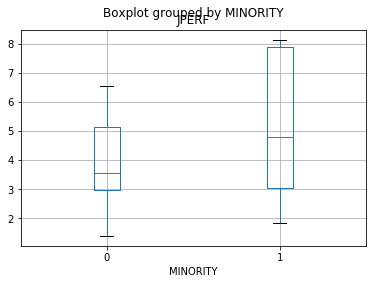

In [5]:
jobtest.boxplot(column=['JPERF'], by='MINORITY')

In [6]:
minority_0 = jobtest[jobtest['MINORITY'] == 0]
minority_1 = jobtest[jobtest['MINORITY'] == 1]

minority_0

,TEST,MINORITY,JPERF
10,2.36,0,3.25
11,2.11,0,5.30
12,0.45,0,1.39
13,1.76,0,4.69
14,2.09,0,6.56
15,1.50,0,3.00
16,1.25,0,5.85
17,0.72,0,1.90
18,0.42,0,3.85
19,1.53,0,2.95


####  In the case of the minority effect we can accept the null hypothesis

In [7]:
ttest_ind(minority_1['JPERF'], minority_0['JPERF'], alternative='two-sided', value=0)

(1.2963727328689172, 0.21122206282829195, 18.0)

## Test scores and job performance

In [8]:
jobtest.describe()

,TEST,MINORITY,JPERF
count,20.00000,20.000000,20.000000
mean,1.47150,0.500000,4.508500
std,0.67839,0.512989,2.227711
min,0.28000,0.000000,1.390000
25%,1.12000,0.000000,2.965000
50%,1.51500,0.500000,4.220000
75%,2.00750,1.000000,6.027500
max,2.51000,1.000000,8.140000


In [9]:
low_test = jobtest[jobtest['TEST'] < 1.50]
high_test = jobtest[jobtest['TEST'] >= 1.5]

low_test

,TEST,MINORITY,JPERF
0,0.28,1,1.83
1,0.97,1,4.59
2,1.25,1,2.97
5,1.17,1,3.30
7,1.21,1,2.03
12,0.45,0,1.39
16,1.25,0,5.85
17,0.72,0,1.90
18,0.42,0,3.85


#### In the case of the test scores effect we can reject the null hypotheses, the test is statistically significant

In [10]:
ttest_ind(high_test['JPERF'], low_test['JPERF'], alternative='two-sided', value=0)

(3.1453782341253187, 0.005594750418932369, 18.0)